<a href="https://colab.research.google.com/github/napolitanodst/Apprenticeship-log/blob/Apprenticeship-Code/Geo_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Packages
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import pandas as pd
import numpy as np
import splitfolders
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Importing delle immagini del dataset
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset.zip', 'r') 
zip_ref.extractall('/tmp') 
zip_ref.close()

In [ ]:
# Ridimensionamento delle immagini
import PIL
from PIL import Image
i = r'/tmp/dataset/Sedimentarie'
for file in os.listdir(i):
    i_img = i+"/"+file
    img = Image.open(i_img)
    img = img.resize((384,306))
    img.save(i_img)
q = r'/tmp/dataset/Metamorfiche'
for file in os.listdir(q):
    q_img = q+"/"+file
    img = Image.open(q_img)
    img = img.resize((384,306))
    img.save(q_img)
k = r'/tmp/dataset/Vulcaniche'
for file in os.listdir(k):
    k_img = k+"/"+file
    img = Image.open(k_img)
    img = img.resize((384,306))
    img.save(k_img)

In [ ]:
# Splitting in train, validation set
input = '/tmp/dataset'
output = '/tmp/prova'

splitfolders.ratio(input, output=output, seed=1337,ratio=(.7,.3), group_prefix=None)

Copying files: 210 files [00:00, 3116.46 files/s]


In [ ]:
# Creazione Datasets
cartella = "/tmp/prova/train"
train= tf.keras.utils.image_dataset_from_directory(
             cartella,
             image_size= (384,306)                              
)

cartella2 = "/tmp/prova/val"
val= tf.keras.utils.image_dataset_from_directory(
             cartella2,
             image_size= (384,306)      
) 
classes=train.class_names

Found 146 files belonging to 3 classes.
Found 64 files belonging to 3 classes.


In [ ]:
# Modello
model = tf.keras.models.Sequential(
    [
    tf.keras.layers.Rescaling(1./255),   
    tf.keras.layers.Conv2D(7, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(train.class_names), activation="softmax")
    ]
)

In [ ]:
training=model.compile(
             optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=["accuracy"]
)

In [ ]:
# Early Stopping per monitorare la validation accuracy
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',patience=10)

In [ ]:
#Fitting
labels=train.class_names
history = model.fit(
                    train,
                    validation_data=val,
                    epochs=100,
                    callbacks= [early_stopping]
)

Epoch 1/100
5/5 [==============================] - 14s 2s/step - loss: 1.5245 - accuracy: 0.2671 - val_loss: 1.1863 - val_accuracy: 0.3594
Epoch 2/100
5/5 [==============================] - 12s 2s/step - loss: 0.7824 - accuracy: 0.5959 - val_loss: 1.0776 - val_accuracy: 0.5312
Epoch 3/100
5/5 [==============================] - 14s 3s/step - loss: 0.6468 - accuracy: 0.9452 - val_loss: 1.0303 - val_accuracy: 0.5938
Epoch 4/100
5/5 [==============================] - 14s 3s/step - loss: 0.4418 - accuracy: 0.9726 - val_loss: 0.9740 - val_accuracy: 0.6094
Epoch 5/100
5/5 [==============================] - 14s 2s/step - loss: 0.2132 - accuracy: 0.9932 - val_loss: 0.8803 - val_accuracy: 0.6875
Epoch 6/100
5/5 [==============================] - 14s 3s/step - loss: 0.0849 - accuracy: 1.0000 - val_loss: 0.6567 - val_accuracy: 0.7500
Epoch 7/100
5/5 [==============================] - 14s 3s/step - loss: 0.0415 - accuracy: 0.9932 - val_loss: 0.5876 - val_accuracy: 0.7188
Epoch 8/100
5/5 [==========

<Axes: >

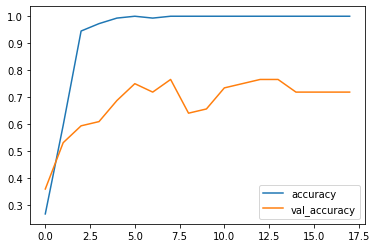

In [ ]:
#Plot di accuracy e val accuracy
pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()

<Axes: >

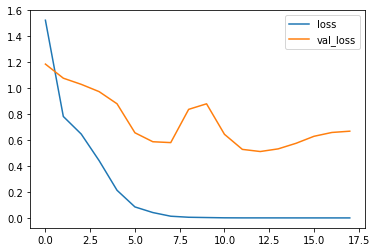

In [ ]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()

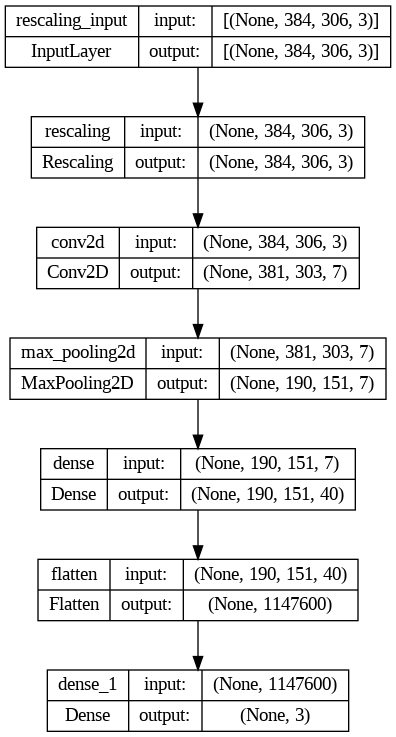

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Confusion Matrix
train_preds = model.predict(train)
train_preds.shape


5/5 [==============================] - 4s 722ms/step


(146, 3)